# STEP:1 **Importing neccesary Libraries**

In [3]:
import nltk # to use stopword and tokenize mwthod
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords #stop word removal
from nltk.tokenize import word_tokenize #converting text to word
from nltk.stem import PorterStemmer #stemming of the data

import gensim   #word embedding  (words to vectors)
from gensim.models import Word2Vec


import pandas as pd # for reading excel file and preprocessing
import numpy as np #will use it if array related work comes
import matplotlib.pyplot as plt #visualization of data
import re #used in preprocessiing of data

from sklearn.ensemble import RandomForestClassifier  #for model
from sklearn.model_selection import train_test_split  #spliting of data into train and text
from sklearn.metrics import confusion_matrix,accuracy_score # for performance measuring

[nltk_data] Downloading package stopwords to C:\Users\prathyush
[nltk_data]     br\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\prathyush
[nltk_data]     br\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# STEP 2: Import Dataset

In [4]:
df=pd.read_excel("Tweet_NFT.xlsx")
df.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [5]:
#knowing the data type of all the column in dataframe 
df.dtypes

id                   int64
tweet_text          object
tweet_created_at    object
tweet_intent        object
dtype: object

In [6]:
#Knowing the shape
df.shape

(127453, 4)

In [7]:
#finding various output category tweet_intent with their distribution
df[["tweet_intent"]].value_counts()

tweet_intent  
Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
dtype: int64

In [8]:
df.isna().sum()# checking for null values

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

In [9]:
print(f"tweet_intent column has {round((df.isna().sum()['tweet_intent']/len(df))*100,2)}%  of null values. That is almost 31089 records")

tweet_intent column has 24.39%  of null values. That is almost 31089 records


# STEP 3: **EDA-Preprocessing of the Data**

In [10]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ_x009d_“#art #artist #...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [11]:
df.drop(['id','tweet_created_at'],axis=1,inplace=True) #column id, tweet_created_at are not required
df.head()

,tweet_text,tweet_intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community
4,@sashadysonn The first project in crypto with ...,Community


In [12]:
df.describe()

,tweet_text,tweet_intent
count,127453,96364
unique,114494,9
top,@Codex314159265 Feature it on @Globalnft07\nWe...,Community
freq,381,41510


In [13]:
print('Shape of Dataframe -> {}' .format(df.shape))

Shape of Dataframe -> (127453, 2)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tweet_text    127453 non-null  object
 1   tweet_intent  96364 non-null   object
dtypes: object(2)
memory usage: 1.9+ MB


In [15]:
def return_missing_values(data_frame):                                  #Let us plot the missing values now
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

In [16]:
return_missing_values(df)

tweet_intent    0.243925
dtype: float64

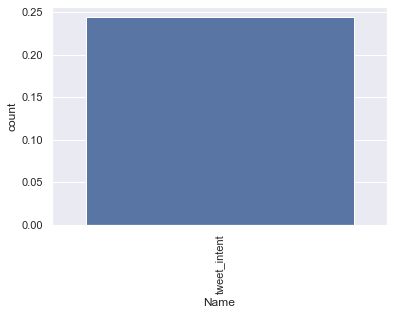

In [18]:
import seaborn as sns
plot_missing_values(df)

<AxesSubplot:>

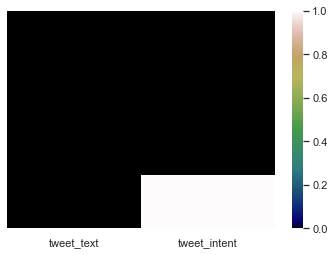

In [19]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='gist_earth')

In [20]:
## NOW let us plot the Unique Values
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [21]:
unidf = return_unique_values(df)
print(unidf)

       Features  Uniques
0    tweet_text   114494
1  tweet_intent        9


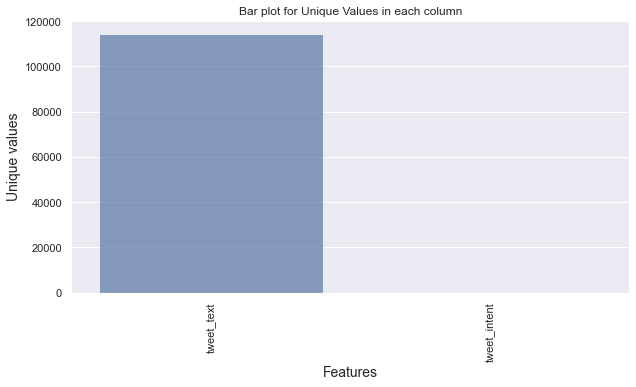

In [22]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()


In [177]:
df.tail(100000)

,tweet_text,tweet_intent
27453,Fuel up and start your engines! Get ready for ...,Giveaway
27454,@rickiejai @atama_nft Congratulations!!,Appreciation
27455,"Check out this 1,000,000 MNZ + 10 Ultra Rare N...",Giveaway
27456,@DropYourNFTs #783th NFT in GuardToons Collect...,Community
27457,@Poeticwtf @DegenDustFlipGG Yoo! That is exact...,Appreciation
...,...,...
127448,"@Jason My company Universe is solving this, an...",NaN
127449,@BosoTokyo Many will get rekt in this NFT,NaN
127450,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,NaN
127451,@1kz3ro @UNLEASHED_NFT I love this job,NaN


In [178]:
stopword_list=stopwords.words('english')

def remove_special_characters(text): #function for special characters like @# etc 
  pattern=r'[^a-zA-Z\s]'
  text=re.sub(pattern," ",text)
  return text

def remove_stopword(text): #function for removing the stopwords which provide no value for understanding the sentence
  new_text=""
  for word in word_tokenize(text):
    if word not in stopword_list:
      new_text=new_text+' '+word
  return new_text

def get_lower_case(df,column):
  df[column]=df[column].str.lower()
  return df


def stem_words(text):   
  if type(text)==np.nan:
    return 'no data'             #This function performs stemming. Stemming  
  ps=PorterStemmer()                #helps us to achieve the root forms of derived words.
  ns=""                             #eg programmer  is converted to  program
  for word in word_tokenize(text):
    ns=ns+' '+ps.stem(word)
  return ns


# STEP:3  **Model Building.**

In [179]:
#We will be spliting the data into 3 parts train , test and validation dataframe
split_point=len(df)-31089
train_test_data=df.iloc[:split_point,]
val_data=df.iloc[split_point:,]

# STEP:4 **Model Training and Testing**

In [180]:
train_test_data

,tweet_text,tweet_intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community
1,Need Sick Character artâ_x009d_“#art #artist #...,Giveaway
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community
4,@sashadysonn The first project in crypto with ...,Community
...,...,...
96359,@nft_cryptogang @liuyan93721534 0x9fE808D8a9E2...,Appreciation
96360,Just registered to win @cryptopunksnfts #1859 ...,Presale
96361,"@SolSniffer Dyor on the nft collection ""Dictat...",Appreciation
96362,#NFT #NFTCommmunity #DeltaFlare\nJoin me on Di...,Community


In [181]:
val_data

,tweet_text,tweet_intent
96364,15% off ðŸ§™â€_x008d_â™‚ï¸_x008f_ #Wizardia NF...,NaN
96365,@asksabir007 @dao_lm Don't miss the chance to ...,NaN
96366,This zesty faucet from @_bitcoiner is making m...,NaN
96367,15% off ðŸ§™â€_x008d_â™‚ï¸_x008f_ #Wizardia NF...,NaN
96368,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s tal...",NaN
...,...,...
127448,"@Jason My company Universe is solving this, an...",NaN
127449,@BosoTokyo Many will get rekt in this NFT,NaN
127450,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,NaN
127451,@1kz3ro @UNLEASHED_NFT I love this job,NaN


Applying the function on dataframe

In [182]:
train_test_data['tweet_text']=train_test_data['tweet_text'].apply(lambda x:remove_special_characters(x))
train_test_data['tweet_text']=train_test_data['tweet_text'].apply(lambda x:remove_stopword(x))
train_test_data=get_lower_case(train_test_data,'tweet_text')
train_test_data['tweet_text']=train_test_data['tweet_text'].apply(lambda x:stem_words(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [183]:
train_test_data=train_test_data.iloc[:70000,]#considering only 80000 records due to ram issue

In [184]:
df.head()

,tweet_text,tweet_intent
0,crypto brodi ecolog moonrunnersnft itsukinft ...,Community
1,need sick charact art x art artist artist ani...,Giveaway
2,the hulk nft inagotchinft tesla killabearsnft...,Appreciation
3,cryptobatznft darekbtw the first project cryp...,Community
4,sashadysonn the first project crypto move ear...,Community


Performing one hot encoding on tweet_intent column  as it is string datatype column and we need it to be binary or integer or float which machine understands.

In [185]:
train_test_data[['Appreciation','Community', 'Done', 'Giveaway', 'Interested', 'Launching Soon','Presale','Whitelist',
       'pinksale']]=pd.get_dummies(train_test_data['tweet_intent'])
train_test_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,tweet_text,tweet_intent,Appreciation,Community,Done,Giveaway,Interested,Launching Soon,Presale,Whitelist,pinksale
0,crypto brodi ecolog moonrunnersnft itsukinft ...,Community,0,1,0,0,0,0,0,0,0
1,need sick charact art x art artist artist ani...,Giveaway,0,0,0,1,0,0,0,0,0
2,the hulk nft inagotchinft tesla killabearsnft...,Appreciation,1,0,0,0,0,0,0,0,0
3,cryptobatznft darekbtw the first project cryp...,Community,0,1,0,0,0,0,0,0,0
4,sashadysonn the first project crypto move ear...,Community,0,1,0,0,0,0,0,0,0


In [186]:
train_test_data.drop('tweet_intent',axis=1,inplace=True)#Dropped tweet intent column as it is of no use
train_test_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tweet_text,Appreciation,Community,Done,Giveaway,Interested,Launching Soon,Presale,Whitelist,pinksale
0,crypto brodi ecolog moonrunnersnft itsukinft ...,0,1,0,0,0,0,0,0,0
1,need sick charact art x art artist artist ani...,0,0,0,1,0,0,0,0,0
2,the hulk nft inagotchinft tesla killabearsnft...,1,0,0,0,0,0,0,0,0
3,cryptobatznft darekbtw the first project cryp...,0,1,0,0,0,0,0,0,0
4,sashadysonn the first project crypto move ear...,0,1,0,0,0,0,0,0,0


In [187]:
def word2vec_model(df): 
  data=[]
  for row in df.iterrows():
      temp = []
      for j in word_tokenize(row[1][0]):
        if j==" ":
          continue
        temp.append(j)
  
      data.append(temp)
  # Create CBOW model
  model1 = gensim.models.Word2Vec(data,size=100,min_count = 1, window = 5)
  return model1

w2c=word2vec_model(train_test_data)

In [188]:
def transform(train_test_data):
  features=[]
  r_list=[]
  for row in train_test_data.iterrows():
    for word in word_tokenize(row[1][0]):
      if word in w2c:
        r_list.append(w2c[word])
      else:
        r_list.append(np.zeros(100))
    features.append(np.mean(r_list,axis=0,dtype=np.float32))
    r_list=[]
  return features

features=transform(train_test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [189]:
len(features) #Checking the length of data

70000

In [190]:
features[0]

array([ 0.23351346,  0.3480476 , -0.7835536 ,  0.8236001 ,  0.707112  ,
       -0.14110509, -0.10812143,  0.06071482, -0.58585215, -0.56484354,
        0.04165615, -1.2522535 ,  0.9169382 ,  0.01657818, -0.4116051 ,
        0.14108925, -0.38502038,  1.1157326 ,  0.5286008 , -0.12879354,
        0.3928083 ,  0.74714565, -0.3629339 ,  0.20347956, -0.6251025 ,
       -0.13978674, -1.8138437 ,  0.38134685, -0.39024132, -0.01927789,
       -0.3574401 ,  0.40337387,  0.1247409 , -0.5531665 , -0.33661518,
       -0.1870618 , -0.9244319 , -0.64565593, -0.0193958 , -0.436381  ,
        0.3344755 ,  1.6274533 , -0.20512569, -0.775188  , -0.02783091,
        0.19449903, -0.03834681,  0.09673214, -0.62762463, -0.01629481,
       -0.6881859 ,  0.3816825 ,  0.608239  , -0.32017374,  0.43487197,
        0.7744736 , -0.1138294 , -0.17841157, -0.14363773,  0.74119806,
        0.3774391 , -0.08685748, -0.09726451, -0.7940503 ,  0.09472259,
       -0.63362074, -0.6159672 ,  0.9166529 ,  0.8591512 , -0.25

# STEP:5 **Model Evaluation**

In [191]:
x=features
y=train_test_data.drop('tweet_text',axis=1)

In [192]:
x_train, x_test, y_train, y_test= train_test_split(np.array(x), y, test_size= 0.25, random_state=0)  

In [193]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  # we can increase the no of tree to near 100 to get better results 
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [194]:
y_pred= classifier.predict(x_test)  
accuracy_score(y_test, y_pred) 

0.8492

# STEP 6: **MODEL Validation**

In [195]:
val_data['tweet_text']=val_data['tweet_text'].apply(lambda x:remove_special_characters(x))
val_data['tweet_text']=val_data['tweet_text'].apply(lambda x:remove_stopword(x))
val_data=get_lower_case(val_data,'tweet_text')
val_data['tweet_text']=val_data['tweet_text'].apply(lambda x:stem_words(x))
val_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,tweet_text,tweet_intent
96364,x x f wizardia nft p e game magic fill metave...,NaN
96365,asksabir dao lm don miss chanc win nft worth ...,NaN
96366,thi zesti faucet bitcoin make tweet claim fre...,NaN
96367,x x f wizardia nft p e game magic fill metave...,NaN
96368,kavaboy nft tanya messag let talk market project,NaN


In [196]:
features_val=transform(val_data)#word embedding

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [197]:
x_val=features_val
y_val=classifier.predict(x_val)

#new_output_df=pd.DataFrame(data=list(zip(x_val,y_val)),columns=["tweet","intent"] )

In [207]:
y_val[1]

array([0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [212]:
cols=['Appreciation','Community', 'Done', 'Giveaway', 'Interested', 'Launching Soon','Presale','Whitelist',
       'pinksale']
cols[list(y_val[1]).index(1)] #getting the column name

'Giveaway'

In [220]:
print(f"Input:{val_data['tweet_text'][96364]} \n output:{cols[list(y_val[1]).index(1)]}")

Input: x x f wizardia nft p e game magic fill metavers arena genesi nft api passiv royalti wizard nft access alpha game get http co y zf n zlk nft suppli limit when arena genesi round end price rise 
 output:Giveaway


# THE END